In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
melb = pd.read_csv('melb_data.csv')

In [7]:
#melb.info()

In [11]:
#melb.describe()

In [15]:
#missing values

melb.isnull().sum()

In [17]:
X = melb.drop(['Price'], axis=1)
y = melb.Price


In [21]:
#X.head()

y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [25]:
#split the dataset
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.8, test_size=0.2, random_state=0)

In [29]:
#X_test.isnull().sum()
#y_test.isnull().sum()

In [43]:
#my goal is to clean the training set that is the X_train and the X_valid

#X_train.head()
#X_valid.isnull().sum()

In [31]:
y_train.isnull().sum()
#y_valid.isnull().sum()

0

In [47]:
#first am going to separate the X_train, the numerical columns and the categorical columns
X_train_num = X_train.select_dtypes(exclude=['object'])
X_train_cat = X_train.select_dtypes(exclude=['float64', 'int64'])

In [15]:
#X_train_num.info()
#X_train_cat.info()

In [16]:
#checking the mssing values on oth subsets
#X_train_num.isnull().sum()
#X_train_cat.isnull().sum()

#both the categorical data and the numerical subsets have missing values 

In [45]:
#next am going to separate the X_valid numerical and the categorical columns
X_valid_num = X_valid.select_dtypes(exclude=['object'])
X_valid_cat = X_valid.select_dtypes(exclude=['float64', 'int64'])

In [18]:
#X_valid_num.info()
#X_valid_cat.info()

In [49]:
#so next am going to preprocess the subsets of X_train, 
#applying the simple imputer on X_train_num
#applying simple imputer and one hot encoder on X_train_cat
#after i concatent them back together to form the preprocessed X_train
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#appling the simple imputer on X_train_num
num_imputer = SimpleImputer(strategy='median')
imputed_X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train_num))
#imputation removes the column names
#imputed_X_train_num.head()
#put them back
imputed_X_train_num.columns = X_train_num.columns
#imputed_X_train_num.head()
#imputed_X_train_num.isnull().sum()


#applying simple imputer and one hot encoder on X_train_cat
cat_imputer = SimpleImputer(strategy='most_frequent')
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
imputed_X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train_cat))
#imputer removes the column names put them back
imputed_X_train_cat.columns = X_train_cat.columns
#imputed_X_train_cat.head()
one_hot_imputed_X_train_cat = pd.DataFrame(one_hot_encoder.fit_transform(imputed_X_train_cat))
#one_hot_imputed_X_train_cat.head()
#put the index back 
one_hot_imputed_X_train_cat.index = imputed_X_train_cat.index
#one_hot_imputed_X_train_cat.head()

#after i concatent them back together to form the preprocessed X_train
X_train_preprocessed = pd.concat([imputed_X_train_num, one_hot_imputed_X_train_cat], axis=1)

# Ensure all columns have string type
X_train_preprocessed.columns = X_train_preprocessed.columns.astype(str)

In [55]:
#X_train_preprocessed.head()
#X_train_preprocessed.isnull().sum()

In [57]:
#so next am going to preprocess the subsets of X_valid 
# Just transform using the already-fitted imputers and encoders from training X_valid_num, X_valid_cat
#concatent them back together to form the preprocessed X_train

#for the X_valid_num transform it using the fitted num_imputer
imputed_X_valid_num = pd.DataFrame(num_imputer.transform(X_valid_num))
#imputed_X_valid_num.isnull().sum()
imputed_X_valid_num.columns = X_valid_num.columns
#imputed_X_valid_num.head()


#for the X_valid_cat transform it using the fitted cat_imputer and one_hot_encoder
imputed_X_valid_cat = pd.DataFrame(cat_imputer.transform(X_valid_cat))
imputed_X_valid_cat.columns = X_valid_cat.columns
one_hot_imputed_X_valid_cat = pd.DataFrame(one_hot_encoder.transform(imputed_X_valid_cat))
#put the index back
one_hot_imputed_X_valid_cat.index = imputed_X_valid_cat.index

#concatent them back together to form the preprocessed X_train
X_valid_preprocessed = pd.concat([imputed_X_valid_num, one_hot_imputed_X_valid_cat], axis=1)

# Ensure all columns have string type
X_valid_preprocessed.columns = X_valid_preprocessed.columns.astype(str)


In [59]:
X_valid_preprocessed.head()
#X_valid_preprocessed.isnull().sum()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,9232,9233,9234,9235,9236,9237,9238,9239,9240,9241
0,2.0,4.0,3057.0,2.0,1.0,1.0,159.0,126.0,1970.0,-37.77726,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,15.0,3085.0,4.0,2.0,2.0,551.0,150.0,1997.0,-37.73020,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,8.2,3041.0,3.0,2.0,2.0,288.0,94.0,1970.0,-37.73415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,2.6,3052.0,4.0,3.0,1.0,289.0,126.0,1970.0,-37.79590,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,6.6,3011.0,3.0,3.0,2.0,227.0,211.0,2015.0,-37.80330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=0)

In [24]:
model_2 = RandomForestRegressor(n_estimators=200, random_state=0)
model_2.fit(X_train_preprocessed, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [25]:
pred = model.predict(X_valid_preprocessed)
pred_model_2 = model_2.predict(X_valid_preprocessed)

In [61]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train_preprocessed, y_train)

LinearRegression()

In [21]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train_preprocessed, y_train)


DecisionTreeRegressor(max_depth=5)

In [23]:
tree_pred = tree.predict(X_valid_preprocessed)

In [31]:
pip install ipython 


Note: you may need to restart the kernel to use updated packages.


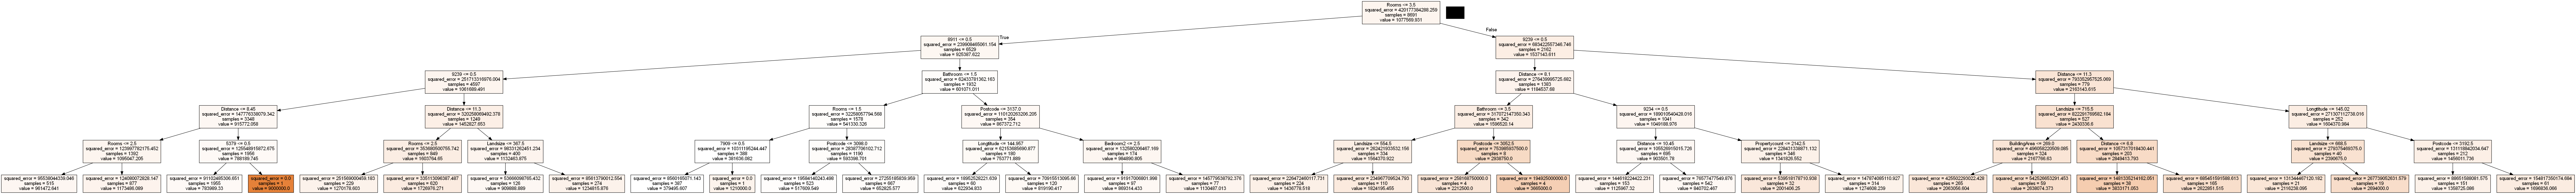

In [29]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(tree,
                          out_file=None,
                          feature_names=X_train_preprocessed.columns,
                          filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
from sklearn.metrics import mean_absolute_error

score = mean_absolute_error(y_valid, pred)
score_2 = mean_absolute_error(y_valid, pred_model_2) 
score_tree = mean_absolute_error(y_valid, tree_pred)

print(f"the error is: {score}")
print(f"the error for model 2 is: {score_2}")
print(f"the error for tree is: {score_tree}")

NameError: name 'pred' is not defined

In [ ]:
#giving the model the test data
#but first i need to transform the test data

#forming the categroical and numerical subsets of X_test
num_X_test = X_test.select_dtypes(exclude=['object'])
cat_X_test = X_test.select_dtypes(exclude=['float64', 'int64'])

#num_X_test.head()
#cat_X_test.head()

In [ ]:
#preprocessing the numerical features first
imputed_num_X_test = pd.DataFrame(num_imputer.transform(num_X_test))
#imputed_num_X_test.head()
#put back the cloumn names 
imputed_num_X_test.columns = num_X_test.columns
#imputed_num_X_test.head()

#preprocessing the categorical features
imputed_cat_X_test = pd.DataFrame(cat_imputer.transform(cat_X_test))
#imputed_cat_X_test.head()
#put back the column names first
imputed_cat_X_test.columns = cat_X_test.columns
#imputed_cat_X_test.head()
one_hot_imputed_cat_X_test = pd.DataFrame(one_hot_encoder.transform(imputed_cat_X_test))
one_hot_imputed_cat_X_test.index = imputed_cat_X_test.index

#concatente them togther to form the X_test_preprocessed

X_test_preprocessed = pd.concat([imputed_num_X_test, one_hot_imputed_cat_X_test], axis=1)

X_test_preprocessed.columns = X_test_preprocessed.columns.astype(str)



In [ ]:
#X_test_preprocessed.head()

In [ ]:
test_pred_model = model.predict(X_test_preprocessed)

test_pred_model_2 = model_2.predict(X_test_preprocessed)

In [ ]:
test_score_model = mean_absolute_error(y_test, test_pred_model)
test_score_model_2 = mean_absolute_error(y_test, test_pred_model_2)


In [ ]:
import joblib

joblib.dump(model_2, "my_model")

In [ ]:
print(f"the error on test data for model is: {test_score_model}")
print(f"the error on test data for model 2 is: {test_score_model_2}")